In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings("ignore")

# Read data from dataset

In [22]:
df_credit_card = pd.read_parquet('dataset/creditcard.parquet')

In [23]:
df_credit_card.head(5)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [24]:
df_credit_card.tail(5)

Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[5 rows x 31 columns]

Time colums means the elapsed time of the transaction against the first row (0sec)<br>
172762 = 2 day of transactions

In [25]:
df_credit_card.shape

(284807, 31)

In [26]:
df_credit_card.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.759061e-12 -8.251130e-13 -9.654937e-13  8.321385e-13   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.649999e-13  4.248366e-13 -3.054600e-13  8.777971e-14 -1.179749e-12   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ... -3.405756e-13 -5.723197e-13 -9.725856e-13  1.464150e-12   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean  -6.987102e-13 -5.617874e-13  3.332082e-12 -3.518874e-12      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [27]:
df_credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Check for missing values

In [28]:
df_credit_card.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [29]:
total =df_credit_card.isnull().sum().sort_values(ascending = False)
percent = (df_credit_card.isnull().sum()/df_credit_card.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

# there is no missing values in the dataset

Time  V16  Amount  V28  V27  V26  V25  V24  V23  V22  ...  V10   V9  \
Total     0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
Percent   0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

          V8   V7   V6   V5   V4   V3   V2  Class  
Total    0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  
Percent  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  

[2 rows x 31 columns]

In [30]:
df_credit_card.duplicated().sum()

1081

In [31]:
# Distribution of legit transactions and fraudulent transactions 
df_credit_card['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [32]:
# Distribution of Fraud and Normal Transactions
import plotly.express as px
px.pie(df_credit_card, names="Class", title="Distribution of Fraud and Normal Transactions:(Normal:0 | Fraud:1)", color_discrete_sequence=['#1E90FF', '#FF4500'],
       template="plotly_dark", width=800, height=600)

This dataset is highly unbalanced
0 -> Normal transactions
1 -> Fraudulent transaction

In [33]:
# Separating the data for analysis
legit = df_credit_card[df_credit_card['Class'] == 0]
fraud = df_credit_card[df_credit_card['Class'] == 1]

In [34]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [35]:
# statistical measure of the data
legit['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [36]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [37]:
# Compare values for both transactions
df_credit_card.groupby('Class').mean()

Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      94838.202258  0.008258 -0.006271  0.012171 -0.007860  0.005453   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0      0.002419  0.009637 -0.000987  0.004467  ... -0.000644 -0.001235   
1     -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.000024  0.000070  0.000182 -0.000072 -0.000089 -0.000295 -0.000131   
1      0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

           Amount  
Class              
0       88.291022  
1      122.211321  

[2 rows x 30 columns]

In [38]:
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(35,20))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.6f'
                ,annot_kws={'size': 10},cmap= 'summer_r')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

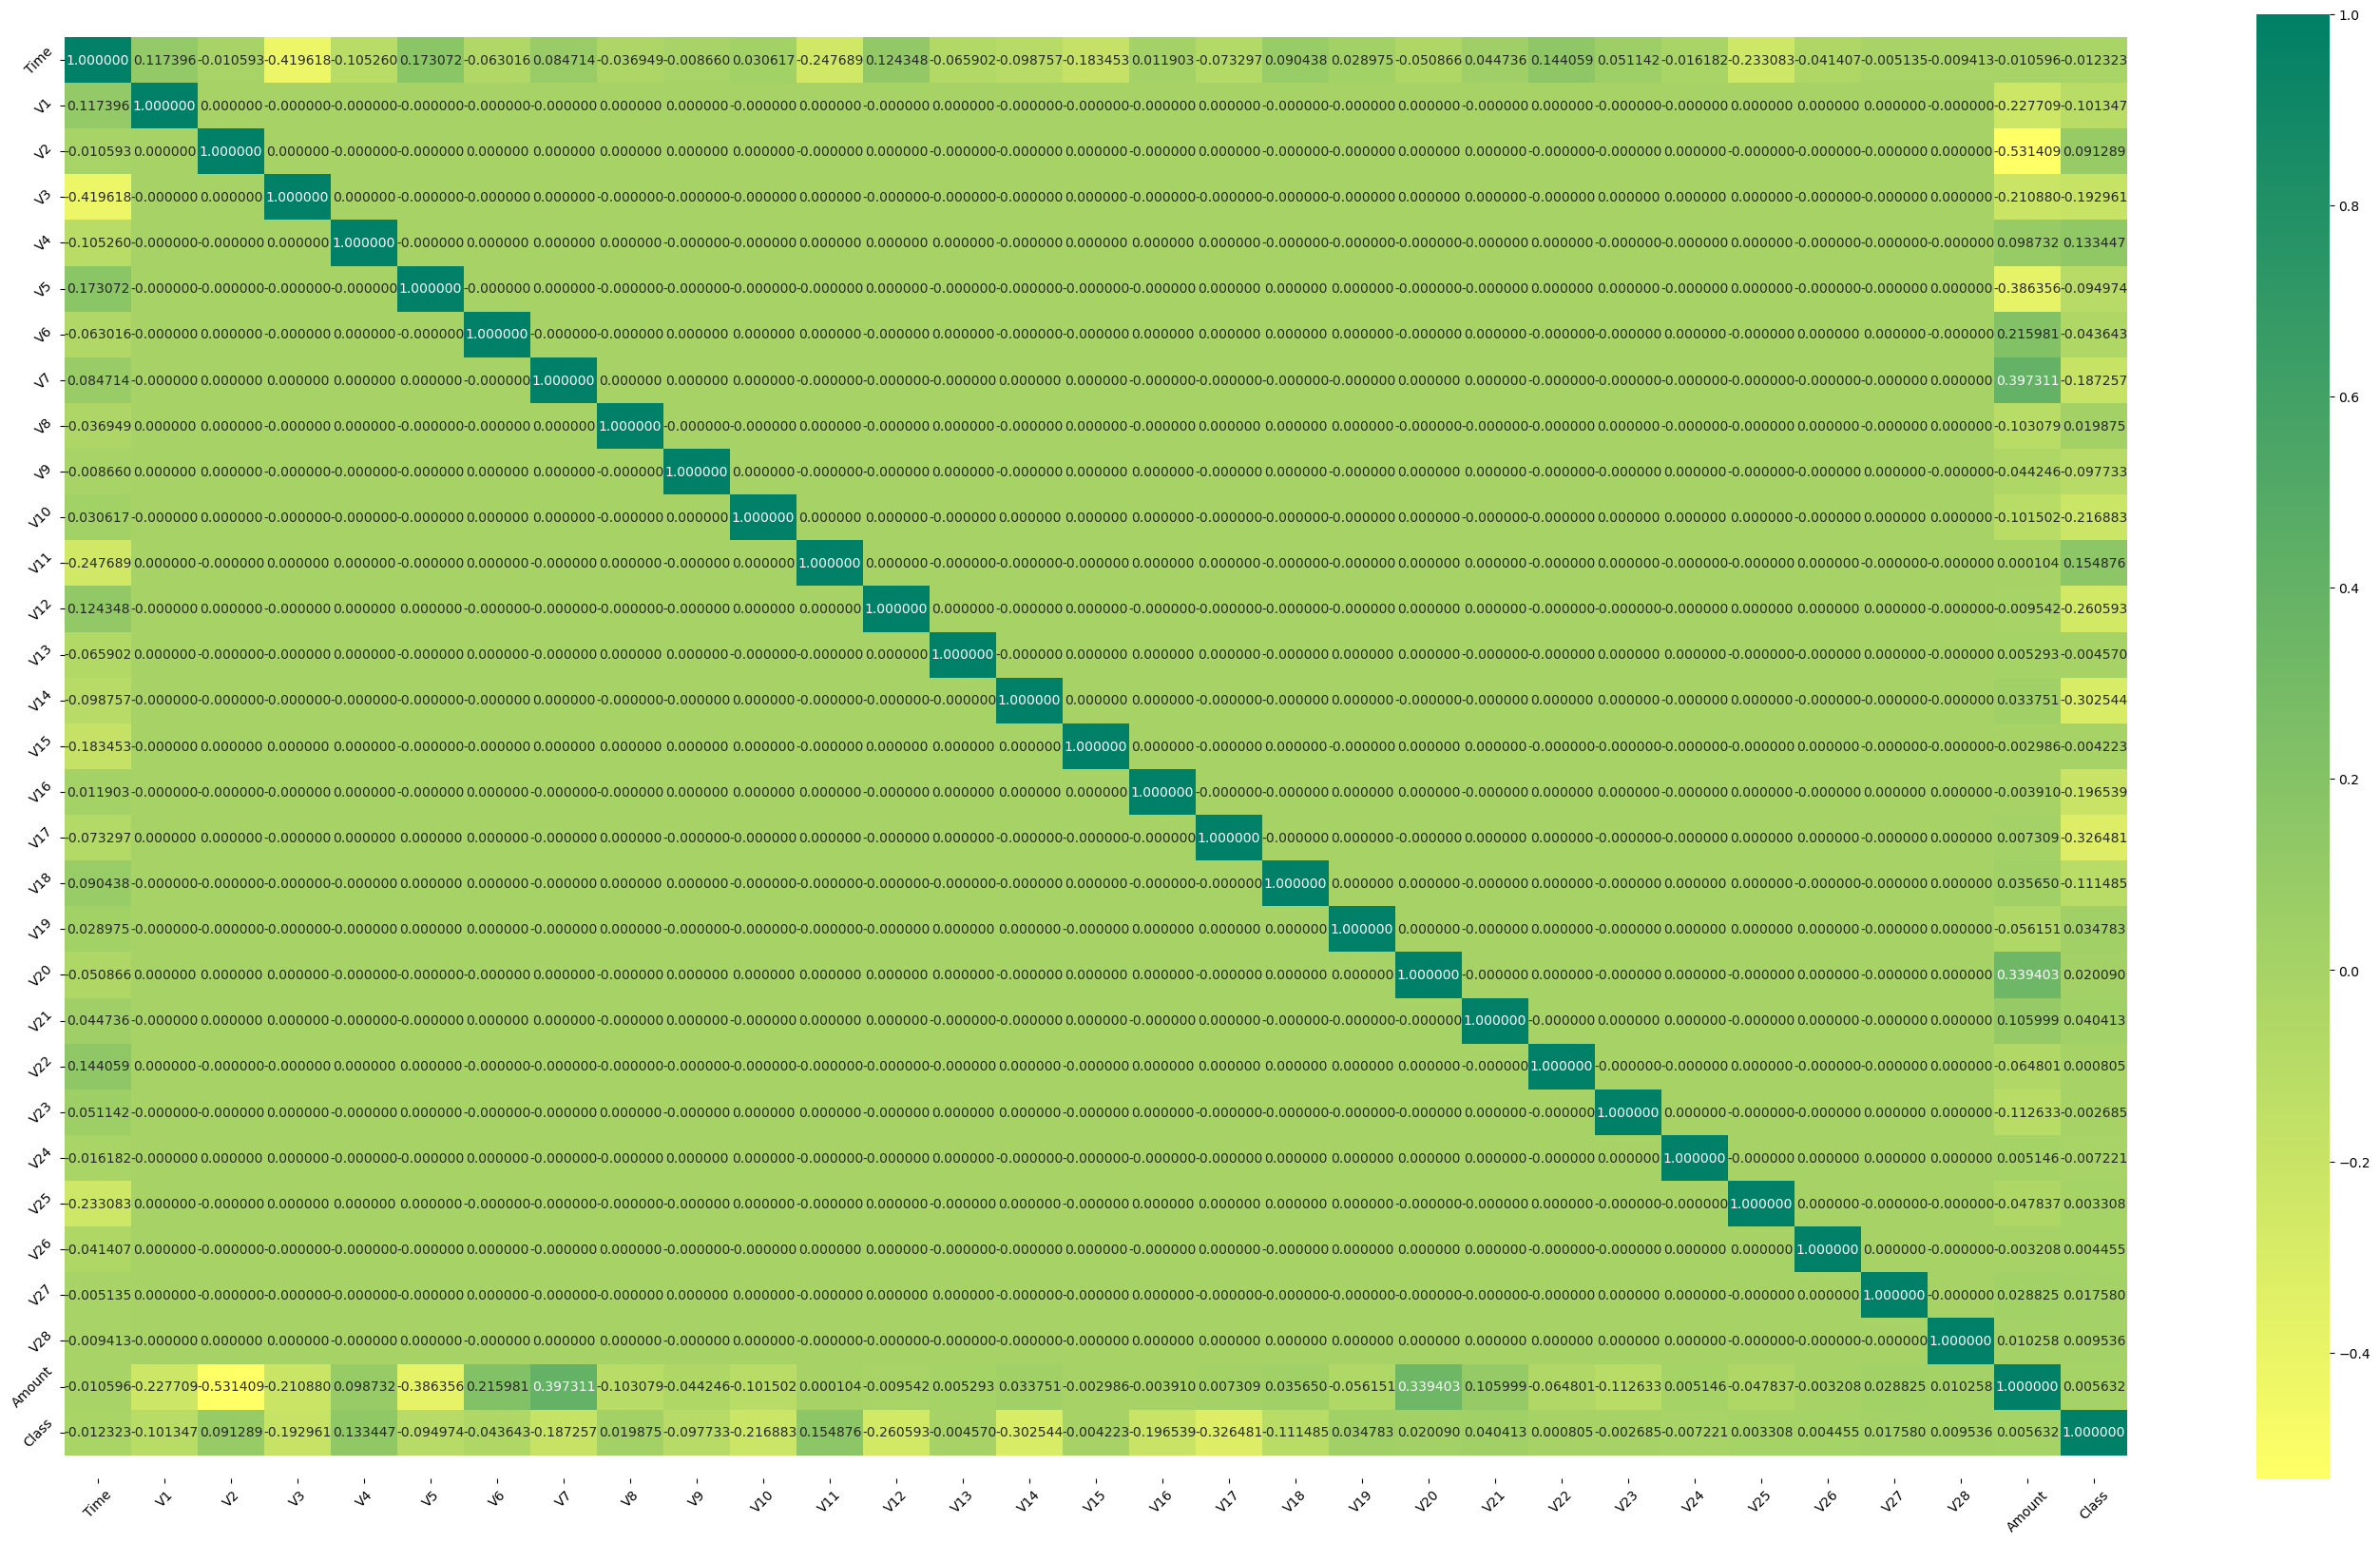

In [39]:
# correlation matrix
corr = df_credit_card.corr()
plot_corre_heatmap(corr)

# Build a sample dataset containing similar distribution of normal transactions and fraudulent transactions

Number of fraudulent transactions -> 492

In [40]:
legit_sample = legit.sample(n=492)

Concatenate dataframes

In [41]:
new_df = pd.concat([legit_sample, fraud], axis=0)

In [42]:
new_df.head()

Time        V1        V2        V3        V4        V5        V6  \
228329  145466.0 -0.149804  0.545842  0.092253 -0.036000  1.234589 -0.772069   
58762    48534.0 -1.369404  0.726325  1.025037  0.191384 -0.065888 -0.139227   
227009  144897.0  2.121149 -1.427920 -3.471820 -3.751084  1.808651  2.529823   
111746   72353.0 -1.312032  1.032726  0.888847  0.712112  0.108718  0.181399   
108875   71115.0 -0.851575  0.788376  0.265235 -1.739974 -0.306789 -1.113897   

              V7        V8        V9  ...       V21       V22       V23  \
228329  0.711499 -0.211508 -0.408597  ...  0.413326  1.238783 -0.159040   
58762   0.274112  0.567879 -0.504061  ...  0.058712  0.276038  0.045852   
227009 -0.532590  0.500745  0.617588  ... -0.202240 -0.094475  0.029065   
111746  0.421056 -0.732553 -0.335349  ...  0.886367  0.409591  0.220468   
108875  0.948215  0.223035  0.538739  ...  0.229326  0.808283  0.083523   

             V24       V25       V26       V27       V28  Amount  Class  
228329  0.741906 -0.398650 -0.081026  0.210099  0.225670    1.00      0  
58762   0.275245 -0.120932  0.300118  0.111639  0.090048   44.60      0  
227009  0.706112  0.374540 -0.685917  0.042739 -0.052543   74.98      0  
111746 -0.004306 -0.276295 -0.312123  0.191274  0.154865   50.00      0  
108875  0.450113 -0.101606 -0.813933  0.313022  0.186970   80.10      0  

[5 rows x 31 columns]

In [43]:
new_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [44]:
new_df.groupby('Class').mean()

Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      95057.607724  0.072869 -0.070536  0.070076  0.044069  0.059688   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0      0.037013  0.035368  0.069818  0.033541  ...  0.030051  0.041445   
1     -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.023988 -0.034121 -0.026022  0.001657 -0.011149  0.008073  0.003861   
1      0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

           Amount  
Class              
0       99.002785  
1      122.211321  

[2 rows x 30 columns]

# Splitting the data into features and targets

In [105]:
X = new_df.drop(columns='Class', axis=1)
Y = new_df['Class']

# Split the data into training data and test data

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [108]:
print(X_train.shape, X_test.shape)

(787, 30) (197, 30)


# Model training 

In [109]:
# standardization of data
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [110]:
# model building

knn=KNeighborsClassifier()
svc=SVC()
nb=GaussianNB()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
xgb=XGBClassifier()
lgb=LGBMClassifier()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
lr=LogisticRegression()


models = [knn, svc, nb, dtc, rfc, xgb, lgb, gbc, abc, lr]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(type(model).__name__, "Model Test Accuracy Score is: ", accuracy_score(y_test, y_pred))
    print(type(model).__name__, "Model Test F1 Score is: ", f1_score(y_test, y_pred))
    print(type(model).__name__,"Mean_absolute_error: ",mean_absolute_error(y_test, y_pred))
    print(type(model).__name__,"Mean_squared_error: ",mean_squared_error(y_test, y_pred))
    print(type(model).__name__,"Root_mean_squared_error: ",np.sqrt(mean_squared_error(y_test, y_pred)))
    print(type(model).__name__,"R2_score: ",r2_score(y_test, y_pred))
    print(type(model).__name__,"Classification_report: \n",classification_report(y_test, y_pred))
    fig=px.imshow(confusion_matrix(y_test, y_pred),color_continuous_scale="Viridis",title=type(model).__name__,
                  width=400,height=400,labels=dict(x="Predicted", y="Actual", color="Counts"),template="plotly_dark")
    fig.show()

KNeighborsClassifier Model Test Accuracy Score is:  0.9035532994923858
KNeighborsClassifier Model Test F1 Score is:  0.8972972972972973
KNeighborsClassifier Mean_absolute_error:  0.09644670050761421
KNeighborsClassifier Mean_squared_error:  0.09644670050761421
KNeighborsClassifier Root_mean_squared_error:  0.3105586909226889
KNeighborsClassifier R2_score:  0.6142032570604
KNeighborsClassifier Classification_report: 
               precision    recall  f1-score   support

           0       0.86      0.96      0.91        99
           1       0.95      0.85      0.90        98

    accuracy                           0.90       197
   macro avg       0.91      0.90      0.90       197
weighted avg       0.91      0.90      0.90       197



SVC Model Test Accuracy Score is:  0.9137055837563451
SVC Model Test F1 Score is:  0.9090909090909092
SVC Mean_absolute_error:  0.08629441624365482
SVC Mean_squared_error:  0.08629441624365482
SVC Root_mean_squared_error:  0.29375911261381293
SVC R2_score:  0.6548134405277264
SVC Classification_report: 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        99
           1       0.96      0.87      0.91        98

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197



GaussianNB Model Test Accuracy Score is:  0.9035532994923858
GaussianNB Model Test F1 Score is:  0.8961748633879782
GaussianNB Mean_absolute_error:  0.09644670050761421
GaussianNB Mean_squared_error:  0.09644670050761421
GaussianNB Root_mean_squared_error:  0.3105586909226889
GaussianNB R2_score:  0.6142032570604
GaussianNB Classification_report: 
               precision    recall  f1-score   support

           0       0.86      0.97      0.91        99
           1       0.96      0.84      0.90        98

    accuracy                           0.90       197
   macro avg       0.91      0.90      0.90       197
weighted avg       0.91      0.90      0.90       197



DecisionTreeClassifier Model Test Accuracy Score is:  0.9086294416243654
DecisionTreeClassifier Model Test F1 Score is:  0.90625
DecisionTreeClassifier Mean_absolute_error:  0.09137055837563451
DecisionTreeClassifier Mean_squared_error:  0.09137055837563451
DecisionTreeClassifier Root_mean_squared_error:  0.30227563311592703
DecisionTreeClassifier R2_score:  0.6345083487940631
DecisionTreeClassifier Classification_report: 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91        99
           1       0.93      0.89      0.91        98

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



RandomForestClassifier Model Test Accuracy Score is:  0.934010152284264
RandomForestClassifier Model Test F1 Score is:  0.9297297297297297
RandomForestClassifier Mean_absolute_error:  0.06598984771573604
RandomForestClassifier Mean_squared_error:  0.06598984771573604
RandomForestClassifier Root_mean_squared_error:  0.25688489195695424
RandomForestClassifier R2_score:  0.7360338074623789
RandomForestClassifier Classification_report: 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94        99
           1       0.99      0.88      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



XGBClassifier Model Test Accuracy Score is:  0.949238578680203
XGBClassifier Model Test F1 Score is:  0.946808510638298
XGBClassifier Mean_absolute_error:  0.050761421319796954
XGBClassifier Mean_squared_error:  0.050761421319796954
XGBClassifier Root_mean_squared_error:  0.22530295452966645
XGBClassifier R2_score:  0.7969490826633684
XGBClassifier Classification_report: 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95        99
           1       0.99      0.91      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



[LightGBM] [Info] Number of positive: 394, number of negative: 393
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7645
[LightGBM] [Info] Number of data points in the train set: 787, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500635 -> initscore=0.002541
[LightGBM] [Info] Start training from score 0.002541
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LGBMClassifier Model Test Accuracy Score is:  0.934010152284264
LGBMClassifier Model Test F1 Score is:  0.9297297297297297
LGBMClassifier Mean_absolute_error:  0.06598984771573604
LGBMClassifier Mean_squared_err

GradientBoostingClassifier Model Test Accuracy Score is:  0.9390862944162437
GradientBoostingClassifier Model Test F1 Score is:  0.9368421052631578
GradientBoostingClassifier Mean_absolute_error:  0.06091370558375635
GradientBoostingClassifier Mean_squared_error:  0.06091370558375635
GradientBoostingClassifier Root_mean_squared_error:  0.24680702093691814
GradientBoostingClassifier R2_score:  0.7563388991960421
GradientBoostingClassifier Classification_report: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94        99
           1       0.97      0.91      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



AdaBoostClassifier Model Test Accuracy Score is:  0.9289340101522843
AdaBoostClassifier Model Test F1 Score is:  0.9255319148936171
AdaBoostClassifier Mean_absolute_error:  0.07106598984771574
AdaBoostClassifier Mean_squared_error:  0.07106598984771574
AdaBoostClassifier Root_mean_squared_error:  0.2665820508731144
AdaBoostClassifier R2_score:  0.7157287157287158
AdaBoostClassifier Classification_report: 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93        99
           1       0.97      0.89      0.93        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



LogisticRegression Model Test Accuracy Score is:  0.934010152284264
LogisticRegression Model Test F1 Score is:  0.9304812834224598
LogisticRegression Mean_absolute_error:  0.06598984771573604
LogisticRegression Mean_squared_error:  0.06598984771573604
LogisticRegression Root_mean_squared_error:  0.25688489195695424
LogisticRegression R2_score:  0.7360338074623789
LogisticRegression Classification_report: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94        99
           1       0.98      0.89      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



In [111]:
# comparing all model accuracy:   

models = [knn, svc, nb, dtc, rfc, xgb, lgb, gbc, abc, lr]

fig = px.bar(x=[type(model).__name__ for model in models], y=[accuracy_score(y_test, model.predict(X_test)) for model in models],
             color=[accuracy_score(y_test, model.predict(X_test)) for model in models], color_continuous_scale="Viridis",
             title="Models Comparison", labels=dict(x="Models", y="Accuracy"), template="plotly_dark", width=800,
             height=600,text=[accuracy_score(y_test, model.predict(X_test)) for model in models])
#fig.update_layout(yaxis_range=[0.97,0.99]) 
fig.show()

# Feature Importance

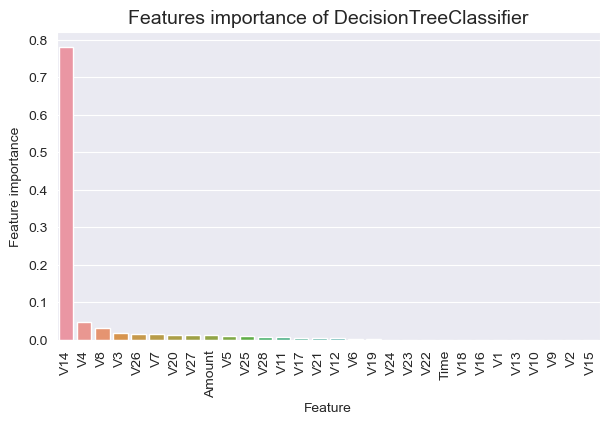

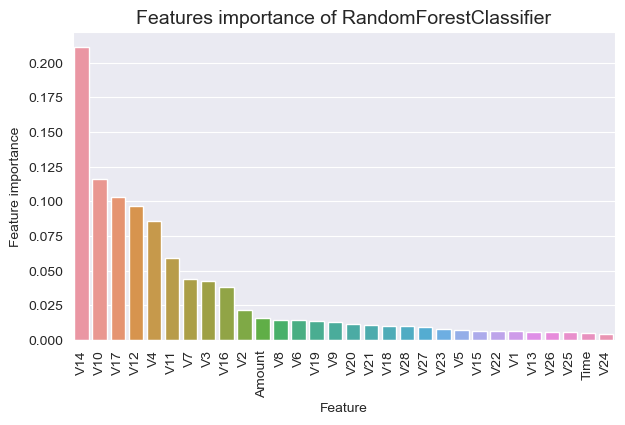

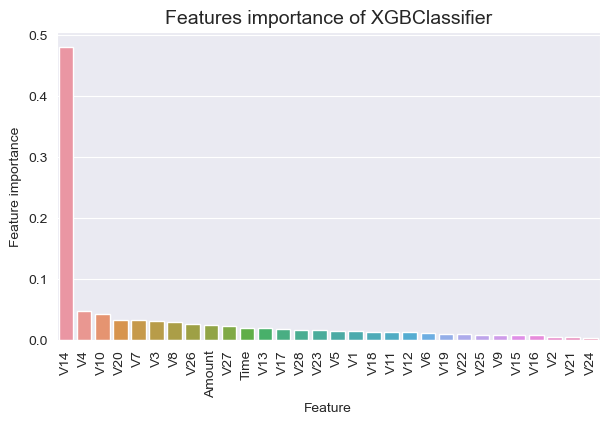

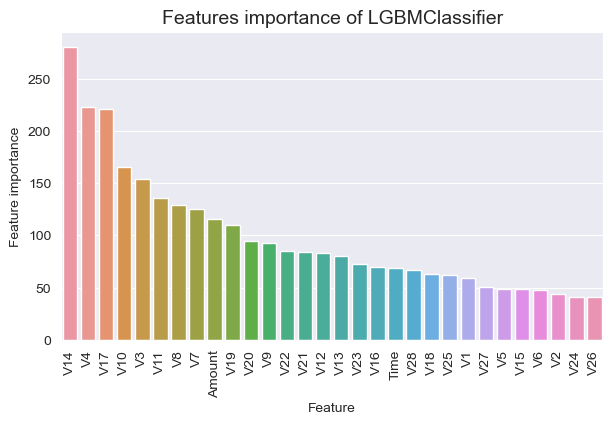

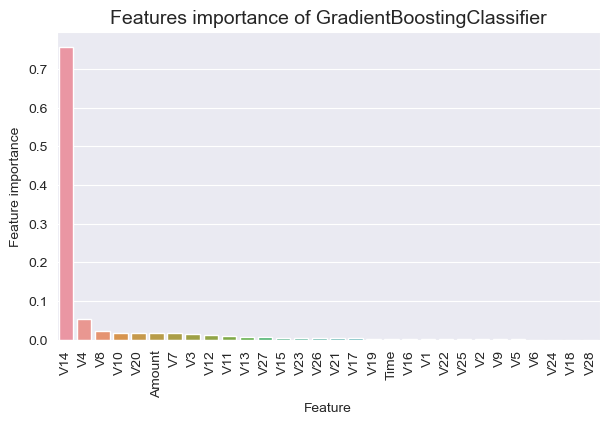

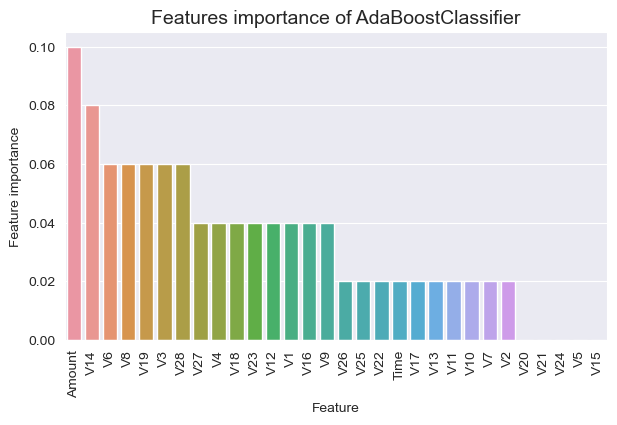

In [112]:
# Feature Importance

# for all models
models = [knn, svc, nb, dtc, rfc, xgb, lgb, gbc, abc, lr]

target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
              'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
              'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
              'Amount']

for model in models:
    # there is no feature importance attribute in SVC and Logistic regression
    if model == svc or model == lr or model == knn or model == nb:
           continue
    tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': model.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    plt.figure(figsize = (7,4))
    plt.title('Features importance of '+type(model).__name__,fontsize=14)
    s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()   

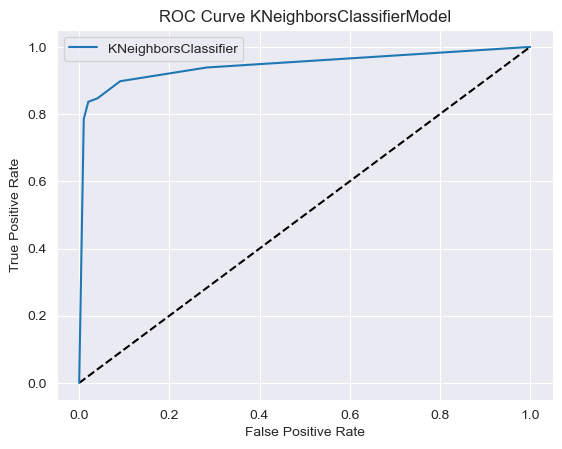

KNeighborsClassifier Model AUC Score is:  0.9447021232735517


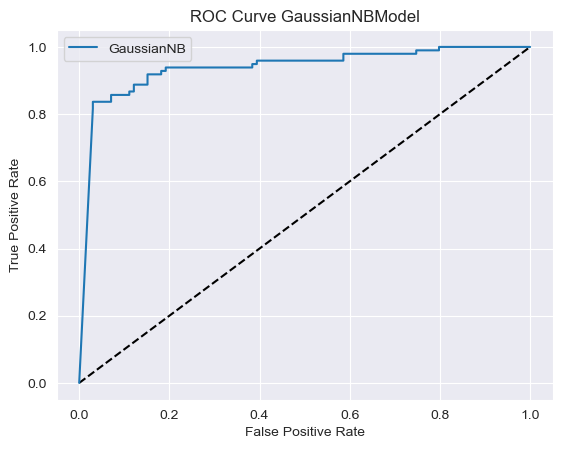

GaussianNB Model AUC Score is:  0.9378478664192951


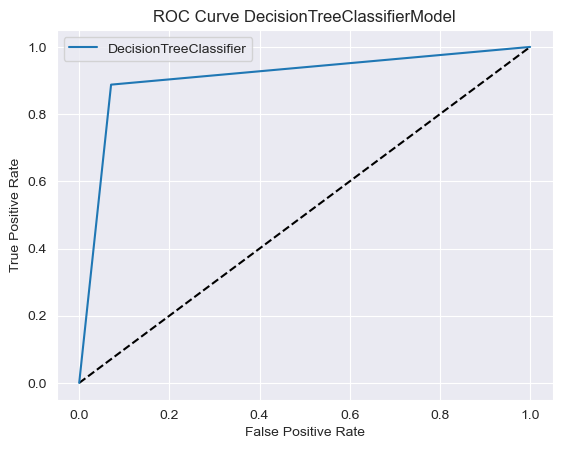

DecisionTreeClassifier Model AUC Score is:  0.9085240156668728


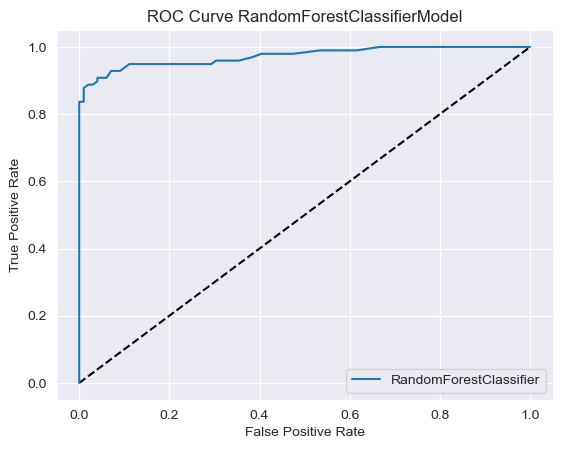

RandomForestClassifier Model AUC Score is:  0.972737579880437


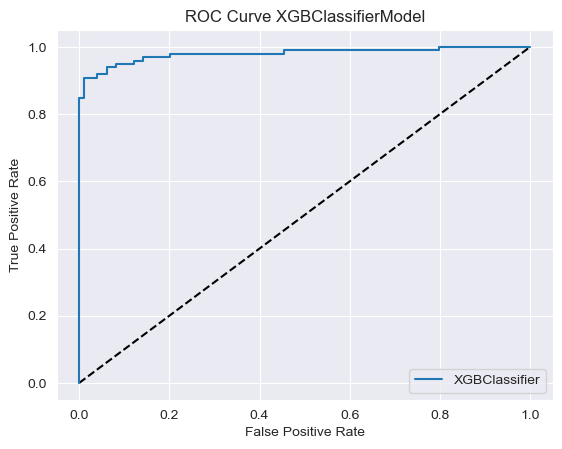

XGBClassifier Model AUC Score is:  0.9793856936714079


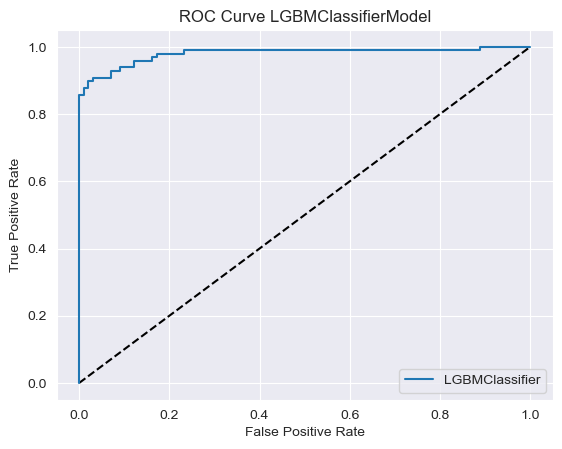

LGBMClassifier Model AUC Score is:  0.9793856936714079


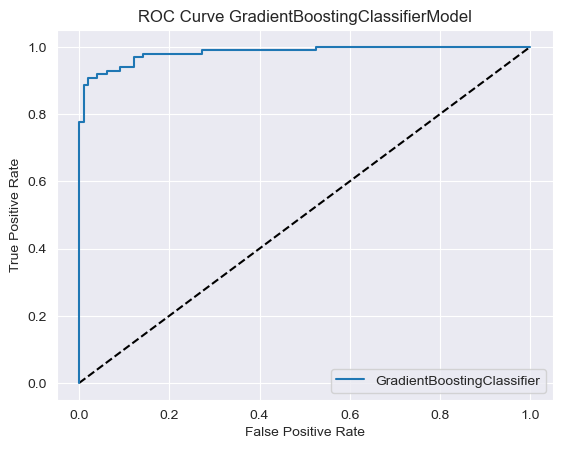

GradientBoostingClassifier Model AUC Score is:  0.9831993403421975


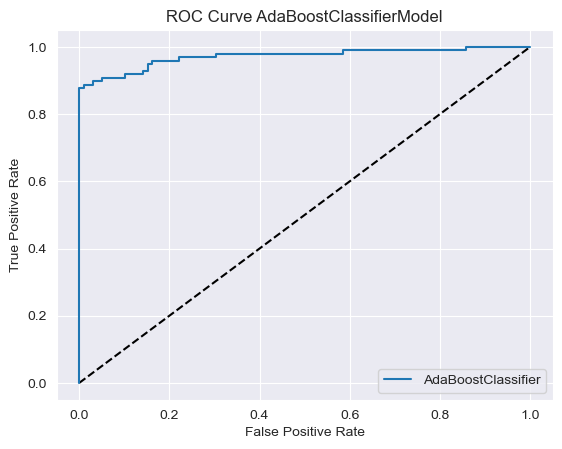

AdaBoostClassifier Model AUC Score is:  0.971758400329829


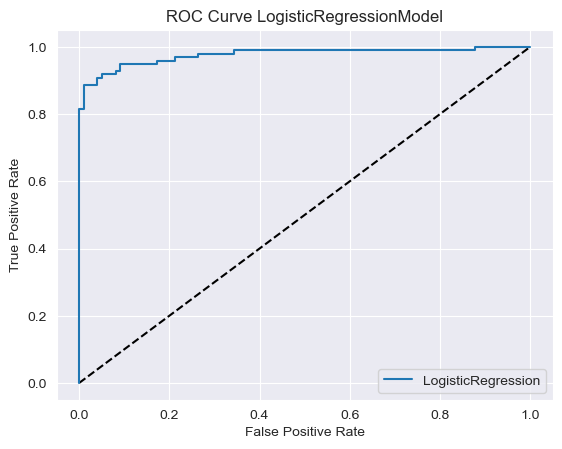

LogisticRegression Model AUC Score is:  0.9761904761904762


In [123]:
models = [knn, rfc, xgb, gbc, dtc, lr]
models = [knn, nb, dtc, rfc, xgb, lgb, gbc, abc, lr]
for model in models:
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot([0, 1], [0, 1], "k--")
    plt.plot(fpr, tpr, label=type(model).__name__)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve "+type(model).__name__+"Model")
    plt.legend()
    plt.show()
    print(type(model).__name__, "Model AUC Score is: ", auc(fpr, tpr))

# PCA

Text(0.5, 1.0, 'PCA: 2 Component')

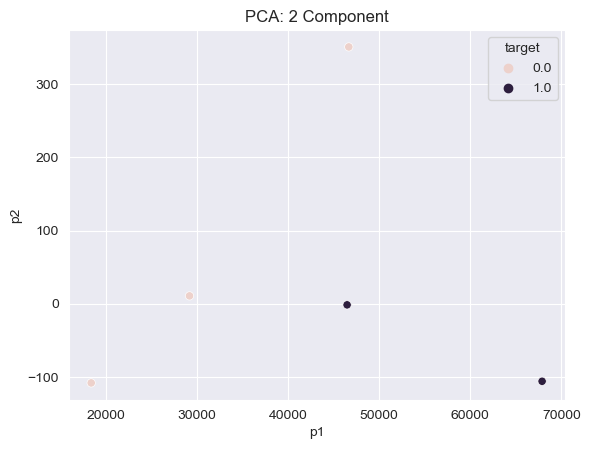

In [104]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

#visualization of reduced data:
sns.set_style("darkgrid")
pca_data = pd.DataFrame(X_reduced,columns=["p1","p2"])
pca_data["target"] = Y
sns.scatterplot(x="p1", y="p2", hue="target", data=pca_data)
plt.title("PCA: 2 Component")

In [86]:
# after pca, model building
X_train, X_test, y_train, y_test = train_test_split(X_reduced, Y, test_size=0.2, stratify=Y, random_state=2)

models =[knn,rfc,xgb,gbc,svc,dtc,lr]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(type(model).__name__, "Model Test Accuracy Score is: ", accuracy_score(y_test, y_pred))
    print(type(model).__name__, "Model Test F1 Score is: ", f1_score(y_test, y_pred))
    print(type(model).__name__,"Mean_absolute_error: ",mean_absolute_error(y_test, y_pred))
    print(type(model).__name__,"Mean_squared_error: ",mean_squared_error(y_test, y_pred))
    print(type(model).__name__,"Root_mean_squared_error: ",np.sqrt(mean_squared_error(y_test, y_pred)))
    print(type(model).__name__,"R2_score: ",r2_score(y_test, y_pred))
    print(type(model).__name__,"Classification_report: \n",classification_report(y_test, y_pred))
    fig=px.imshow(confusion_matrix(y_test, y_pred),color_continuous_scale="Viridis",title=type(model).__name__,
                  width=400,height=400,labels=dict(x="Predicted", y="Actual", color="Counts"),template="plotly_dark")
    fig.show()

KNeighborsClassifier Model Test Accuracy Score is:  0.6040609137055838
KNeighborsClassifier Model Test F1 Score is:  0.61
KNeighborsClassifier Mean_absolute_error:  0.39593908629441626
KNeighborsClassifier Mean_squared_error:  0.39593908629441626
KNeighborsClassifier Root_mean_squared_error:  0.6292369079245242
KNeighborsClassifier R2_score:  -0.5837971552257264
KNeighborsClassifier Classification_report: 
               precision    recall  f1-score   support

           0       0.61      0.59      0.60        99
           1       0.60      0.62      0.61        98

    accuracy                           0.60       197
   macro avg       0.60      0.60      0.60       197
weighted avg       0.60      0.60      0.60       197



RandomForestClassifier Model Test Accuracy Score is:  0.6903553299492385
RandomForestClassifier Model Test F1 Score is:  0.6839378238341969
RandomForestClassifier Mean_absolute_error:  0.3096446700507614
RandomForestClassifier Mean_squared_error:  0.3096446700507614
RandomForestClassifier Root_mean_squared_error:  0.5564572490773765
RandomForestClassifier R2_score:  -0.23861059575345256
RandomForestClassifier Classification_report: 
               precision    recall  f1-score   support

           0       0.69      0.71      0.70        99
           1       0.69      0.67      0.68        98

    accuracy                           0.69       197
   macro avg       0.69      0.69      0.69       197
weighted avg       0.69      0.69      0.69       197



XGBClassifier Model Test Accuracy Score is:  0.6802030456852792
XGBClassifier Model Test F1 Score is:  0.6735751295336787
XGBClassifier Mean_absolute_error:  0.3197969543147208
XGBClassifier Mean_squared_error:  0.3197969543147208
XGBClassifier Root_mean_squared_error:  0.5655059277449891
XGBClassifier R2_score:  -0.27922077922077904
XGBClassifier Classification_report: 
               precision    recall  f1-score   support

           0       0.68      0.70      0.69        99
           1       0.68      0.66      0.67        98

    accuracy                           0.68       197
   macro avg       0.68      0.68      0.68       197
weighted avg       0.68      0.68      0.68       197



GradientBoostingClassifier Model Test Accuracy Score is:  0.6903553299492385
GradientBoostingClassifier Model Test F1 Score is:  0.6965174129353233
GradientBoostingClassifier Mean_absolute_error:  0.3096446700507614
GradientBoostingClassifier Mean_squared_error:  0.3096446700507614
GradientBoostingClassifier Root_mean_squared_error:  0.5564572490773765
GradientBoostingClassifier R2_score:  -0.23861059575345256
GradientBoostingClassifier Classification_report: 
               precision    recall  f1-score   support

           0       0.70      0.67      0.68        99
           1       0.68      0.71      0.70        98

    accuracy                           0.69       197
   macro avg       0.69      0.69      0.69       197
weighted avg       0.69      0.69      0.69       197



SVC Model Test Accuracy Score is:  0.5634517766497462
SVC Model Test F1 Score is:  0.5
SVC Mean_absolute_error:  0.4365482233502538
SVC Mean_squared_error:  0.4365482233502538
SVC Root_mean_squared_error:  0.6607179605173858
SVC R2_score:  -0.7462378890950316
SVC Classification_report: 
               precision    recall  f1-score   support

           0       0.55      0.69      0.61        99
           1       0.58      0.44      0.50        98

    accuracy                           0.56       197
   macro avg       0.57      0.56      0.56       197
weighted avg       0.57      0.56      0.56       197



DecisionTreeClassifier Model Test Accuracy Score is:  0.6598984771573604
DecisionTreeClassifier Model Test F1 Score is:  0.6564102564102564
DecisionTreeClassifier Mean_absolute_error:  0.3401015228426396
DecisionTreeClassifier Mean_squared_error:  0.3401015228426396
DecisionTreeClassifier Root_mean_squared_error:  0.5831822381062712
DecisionTreeClassifier R2_score:  -0.36044114615543155
DecisionTreeClassifier Classification_report: 
               precision    recall  f1-score   support

           0       0.66      0.67      0.66        99
           1       0.66      0.65      0.66        98

    accuracy                           0.66       197
   macro avg       0.66      0.66      0.66       197
weighted avg       0.66      0.66      0.66       197



LogisticRegression Model Test Accuracy Score is:  0.5532994923857868
LogisticRegression Model Test F1 Score is:  0.5463917525773196
LogisticRegression Mean_absolute_error:  0.4467005076142132
LogisticRegression Mean_squared_error:  0.4467005076142132
LogisticRegression Root_mean_squared_error:  0.6683565722084381
LogisticRegression R2_score:  -0.7868480725623579
LogisticRegression Classification_report: 
               precision    recall  f1-score   support

           0       0.55      0.57      0.56        99
           1       0.55      0.54      0.55        98

    accuracy                           0.55       197
   macro avg       0.55      0.55      0.55       197
weighted avg       0.55      0.55      0.55       197



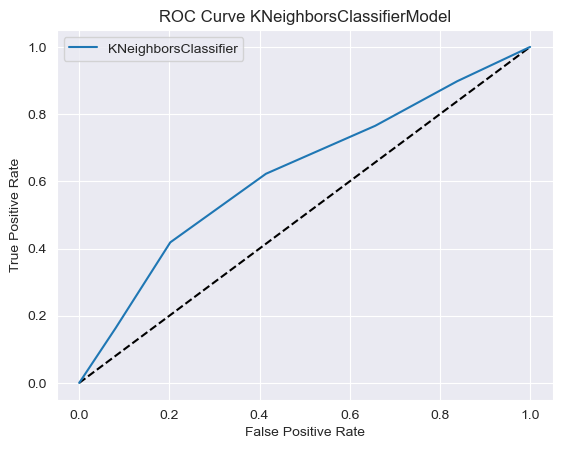

KNeighborsClassifier Model AUC Score is:  0.6250257678829106


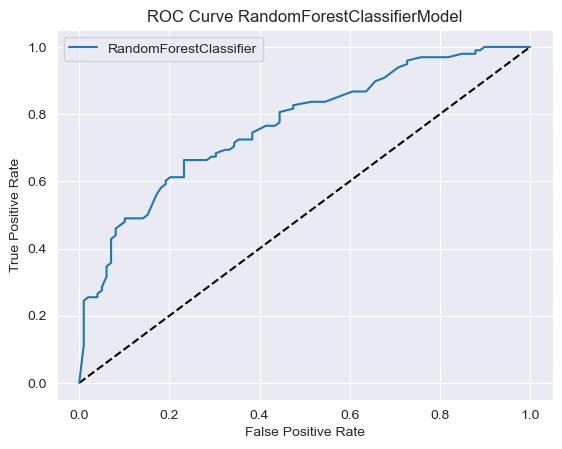

RandomForestClassifier Model AUC Score is:  0.766542980828695


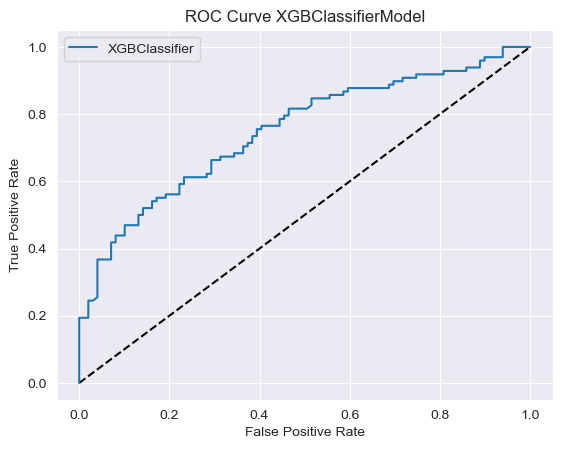

XGBClassifier Model AUC Score is:  0.748711605854463


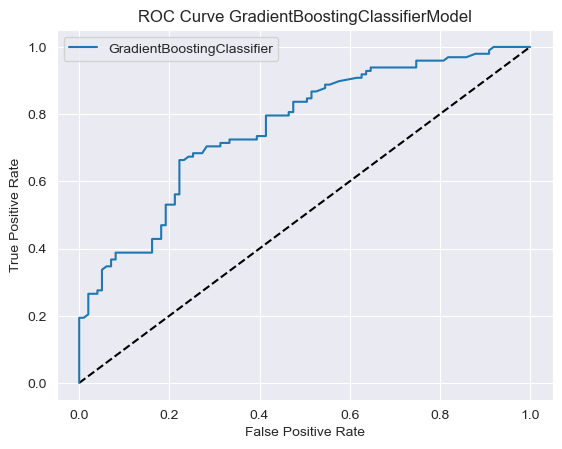

GradientBoostingClassifier Model AUC Score is:  0.7615440115440115


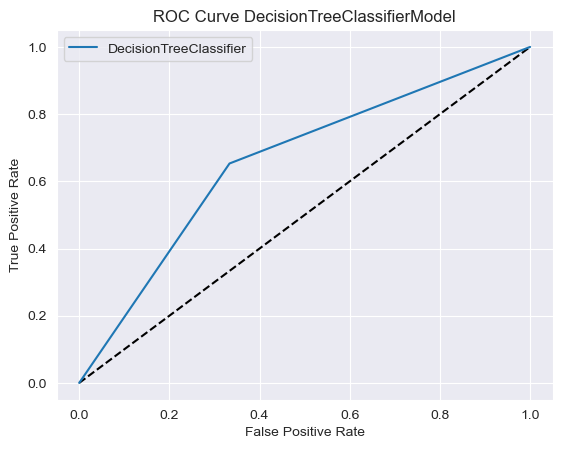

DecisionTreeClassifier Model AUC Score is:  0.6598639455782314


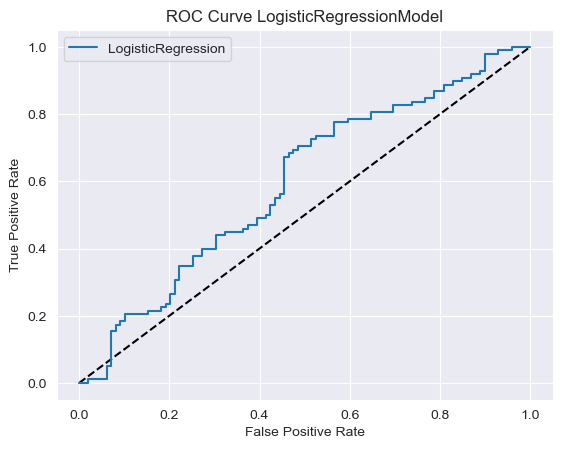

LogisticRegression Model AUC Score is:  0.5949288806431664


In [87]:
from sklearn.metrics import roc_curve, auc

models = [knn, rfc, xgb, gbc, dtc, lr]

for model in models:
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot([0, 1], [0, 1], "k--")
    plt.plot(fpr, tpr, label=type(model).__name__)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve "+type(model).__name__+"Model")
    plt.legend()
    plt.show()
    print(type(model).__name__, "Model AUC Score is: ", auc(fpr, tpr))